# 1. Set Up

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelBinarizer

In [2]:
df = pd.read_csv("H1.csv")
print("There are %d rows and %d columns in the data set.\n" % (df.shape[0],df.shape[1]))
print(df.dtypes)
df.head()

There are 40060 rows and 31 columns in the data set.

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                         int64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWait

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0       342             2015             July   
1           0       737             2015             July   
2           0         7             2015             July   
3           0        13             2015             July   
4           0        14             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     0   
4                     27                      1                     0   

   StaysInWeekNights  Adults  Children          ...               DepositType  \
0                  0       2         0          ...           No Deposit        
1                  0       2         0          ...           No Deposit        
2                  1       1         0          ...           No Deposit        
3                  1       1         0          ...           No Deposit        
4                  2       2         0          ...           No Deposit        

         Agent      Company DaysInWaitingList CustomerType   ADR  \
0         NULL         NULL                 0    Transient   0.0   
1         NULL         NULL                 0    Transient   0.0   
2         NULL         NULL                 0    Transient  75.0   
3          304         NULL                 0    Transient  75.0   
4          240         NULL                 0    Transient  98.0   

   RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus  \
0                         0                       0         Check-Out   
1                         0                       0         Check-Out   
2                         0                       0         Check-Out   
3                         0                       0         Check-Out   
4                         0                       1         Check-Out   

  ReservationStatusDate  
0            2015-07-01  
1            2015-07-01  
2            2015-07-02  
3            2015-07-02  
4            2015-07-03  

[5 rows x 31 columns]

# 2. Select a week to analyse

In [ ]:
# Input start-of-week date to analyse
# Between 1/7/2015 and 24/8/2017
arrival_day = 3
arrival_month = 'September'
arrival_year = 2015

In [6]:
startdate = datetime(arrival_year, datetime.strptime(arrival_month,"%B").month, arrival_day)
daterange = []
print("The range of dates to be analysed is:")

for i in range(7): 
    date = startdate + timedelta(days=i)
    daterange.append([int(date.strftime("%d")),date.strftime("%B"),int(date.strftime("%Y")),date.strftime("%a")])
    print(date.strftime("%a, %d %B %Y"))

enddate = date.strftime("%a, %d %B %Y")

The range of dates to be analysed is:
Thu, 03 September 2015
Fri, 04 September 2015
Sat, 05 September 2015
Sun, 06 September 2015
Mon, 07 September 2015
Tue, 08 September 2015
Wed, 09 September 2015


# 3. Filter Data Set & Add Columns

In [7]:
# Columns of interest
need_cols = ['StaysInWeekendNights','StaysInWeekNights','Adults','Children','Babies','Meal','ReservedRoomType','AssignedRoomType','RequiredCarParkingSpaces']
df1 = pd.DataFrame(columns=need_cols)

# Filtered df
for date in daterange:
    temp = df[(df['ArrivalDateYear']==date[2])
                  & (df['ArrivalDateMonth']==date[1]) 
                  & (df['ArrivalDateDayOfMonth']==date[0]) 
                  & (df['IsCanceled']!=1)][need_cols]
    temp['CheckInDate'] = datetime(date[2], datetime.strptime(date[1],"%B").month, date[0])
    df1 = df1.append(temp, sort=False)

df1['TotalStayDuration']=df1['StaysInWeekendNights']+df1['StaysInWeekNights']
df1 = df1[(df1['TotalStayDuration']!=0)]

# Print df
print("There are %d rows and %d columns in the filtered data set." % (df1.shape[0],df1.shape[1]))

df1.reset_index(drop=True).head()

There are 231 rows and 11 columns in the filtered data set.


StaysInWeekendNights StaysInWeekNights Adults Children Babies       Meal  \
0                    0                 2      2        0      0  BB          
1                    0                 3      2        0      0  BB          
2                    0                 3      2        0      0  BB          
3                    0                 3      2        0      0  BB          
4                    0                 1      2        0      0  BB          

   ReservedRoomType  AssignedRoomType RequiredCarParkingSpaces CheckInDate  \
0  A                 A                                       0  2015-09-03   
1  D                 E                                       1  2015-09-03   
2  A                 A                                       0  2015-09-03   
3  A                 A                                       0  2015-09-03   
4  A                 C                                       1  2015-09-03   

  TotalStayDuration  
0                 2  
1                 3  
2                 3  
3                 3  
4                 1

In [8]:
def checkout(dataframe):
    return dataframe['CheckInDate'] + timedelta(days=dataframe['TotalStayDuration'])

def days_stayed(dataframe):
    output = []
    date = dataframe['CheckInDate']
    for i in range(dataframe['TotalStayDuration']):
        if (i!=0 and date.strftime("%a")==startdate.strftime("%a")):
            break
        output.append(date.strftime("%a"))
        date += timedelta(days=1)
    return output

df1['CheckOutDate'] = df1.apply(checkout,axis=1)
df1['DaysStayed'] = df1.apply(days_stayed,axis=1)
df1.reset_index(drop=True).head()

StaysInWeekendNights StaysInWeekNights Adults Children Babies       Meal  \
0                    0                 2      2        0      0  BB          
1                    0                 3      2        0      0  BB          
2                    0                 3      2        0      0  BB          
3                    0                 3      2        0      0  BB          
4                    0                 1      2        0      0  BB          

   ReservedRoomType  AssignedRoomType RequiredCarParkingSpaces CheckInDate  \
0  A                 A                                       0  2015-09-03   
1  D                 E                                       1  2015-09-03   
2  A                 A                                       0  2015-09-03   
3  A                 A                                       0  2015-09-03   
4  A                 C                                       1  2015-09-03   

  TotalStayDuration CheckOutDate       DaysStayed  
0                 2   2015-09-05       [Thu, Fri]  
1                 3   2015-09-06  [Thu, Fri, Sat]  
2                 3   2015-09-06  [Thu, Fri, Sat]  
3                 3   2015-09-06  [Thu, Fri, Sat]  
4                 1   2015-09-04            [Thu]

# 4. Creating an interval graph

In [21]:
df2 = df1.copy()
weekorder = [i[3] for i in daterange]
def binarize(dataframe, day):
    if day in dataframe['DaysStayed']:
        return 1;
    else:
        return 0;
for i in weekorder:
    df2[i]=df2.apply(lambda x: binarize(x,i),axis=1)
df2 = df2[['ReservedRoomType','CheckInDate']+weekorder].reset_index(drop=True)
df2.head()

ReservedRoomType CheckInDate  Thu  Fri  Sat  Sun  Mon  Tue  Wed
0  A                 2015-09-03    1    1    0    0    0    0    0
1  D                 2015-09-03    1    1    1    0    0    0    0
2  A                 2015-09-03    1    1    1    0    0    0    0
3  A                 2015-09-03    1    1    1    0    0    0    0
4  A                 2015-09-03    1    0    0    0    0    0    0

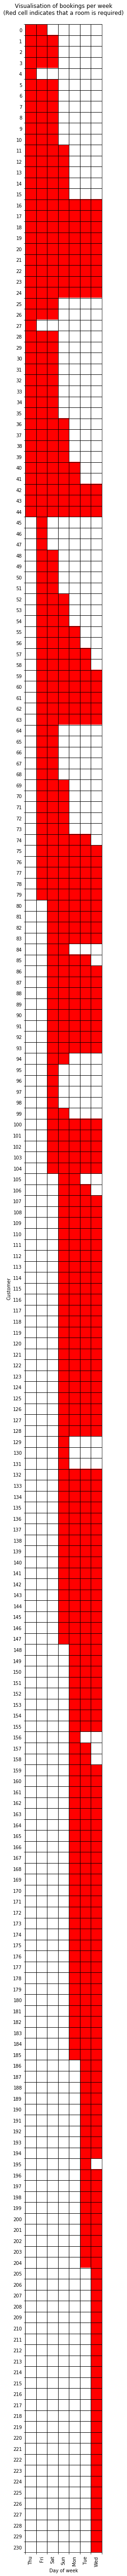

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.transforms

# get data
x = df2[weekorder]

fig, ax = plt.subplots(figsize=(30, 100))

# define the colors
cmap = mpl.colors.ListedColormap(['w', 'r'])

# create a normalize object the describes the limits of
# each color
bounds = [0., 0.5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# plot it
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
ax.set_xticklabels(weekorder,rotation="vertical")
ax.set_yticklabels([i for i in range(x.shape[0])])
ax.set_xticks(np.arange(-.5, x.shape[0], 1));
ax.set_yticks(np.arange(-.5, x.shape[0], 1));
ax.set_xlabel("Day of week")
ax.set_ylabel("Customer")

# Create offset transform by 5 points in x direction
x_dx = 12/72.; x_dy = 0/72.; y_dx=0/72; y_dy=-12/72.;
offsetx = matplotlib.transforms.ScaledTranslation(x_dx, x_dy, fig.dpi_scale_trans)
offsety = matplotlib.transforms.ScaledTranslation(y_dx, y_dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offsetx)
for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offsety)
    
plt.title("Visualisation of bookings per week\n(Red cell indicates that a room is required)\n")
plt.imshow(x, interpolation='none', cmap=cmap, norm=norm)

# 5. Create a network representation

In [12]:
fro = []
to = []
for day in weekorder:
    for i in range(df2.shape[0]):
        for j in range(i+1,df2.shape[0]):
            if ((df2.iloc[i:i+1][day].values[0]) == (df2.iloc[j:j+1][day].values[0])):
                fro.append(i)
                to.append(j)

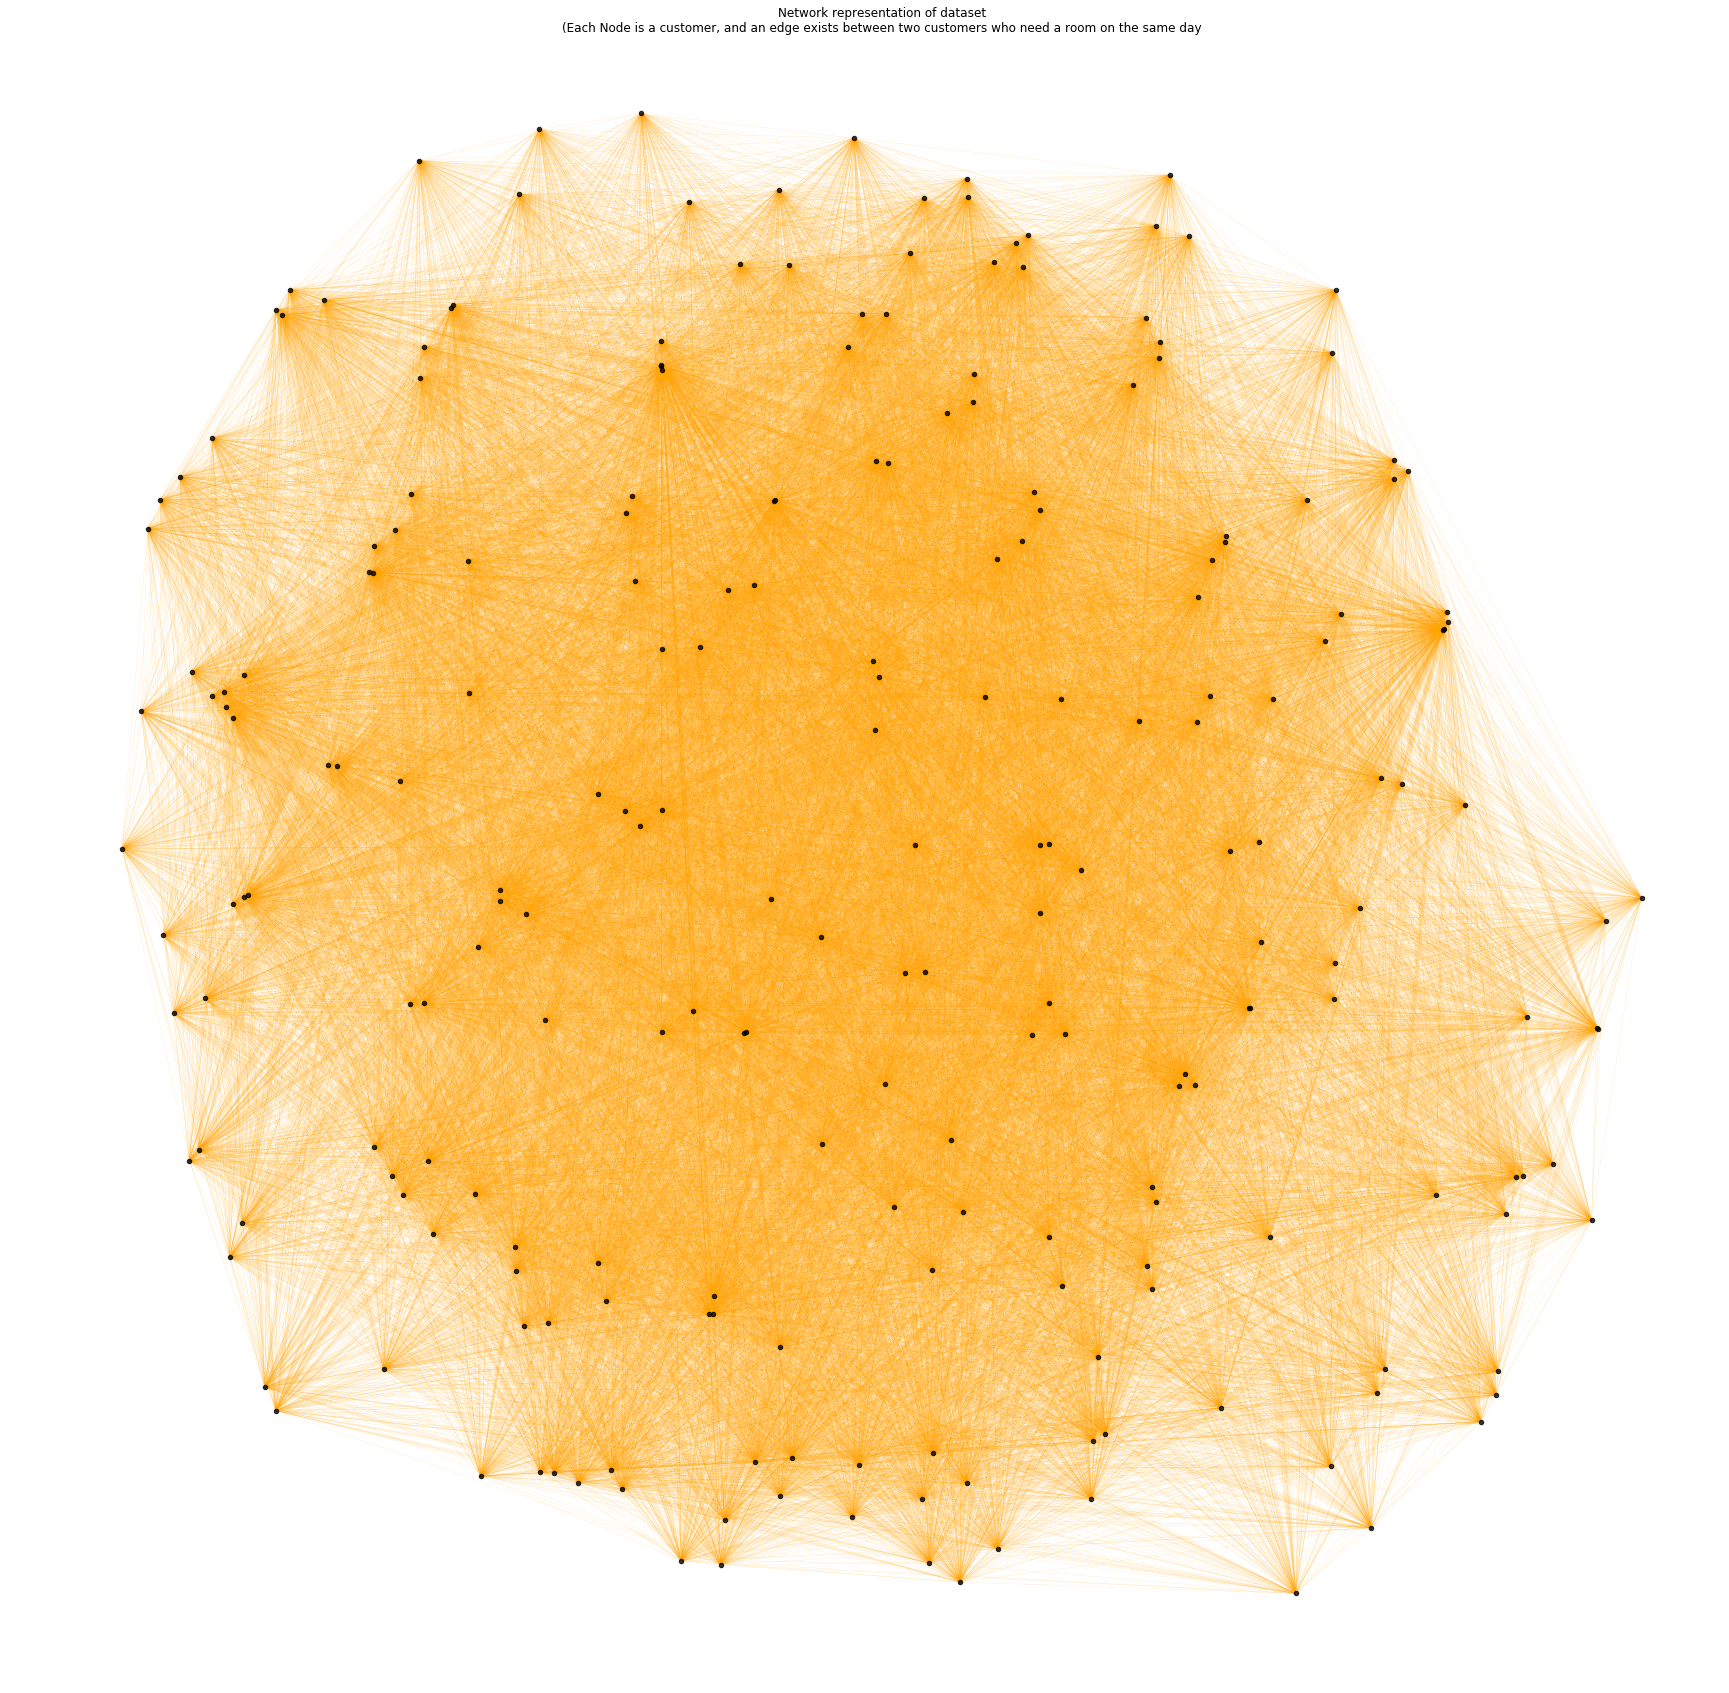

In [23]:
import networkx as nx
 
# Build your graph
G=nx.from_pandas_edgelist(pd.DataFrame({ 'from':fro, 'to':to}), 'from', 'to')
 
# Plot it
fig, ax = plt.subplots(figsize=(30, 30))
nx.draw(G, with_labels=False, node_size=20, width=0.1, node_color="black", alpha=0.8, edge_color='orange', pos=nx.spring_layout(G))
plt.title("Network representation of dataset\n(Each Node is a customer, and an edge exists between two customers who need a room on the same day")
plt.show()

# 6. Applying the vertex chromatic algorithm

The minimum number of rooms to allocate for all 231 guests who stay at the hotel
during the week between Thu, 03 September 2015 and Wed, 09 September 2015 is: 197 rooms.


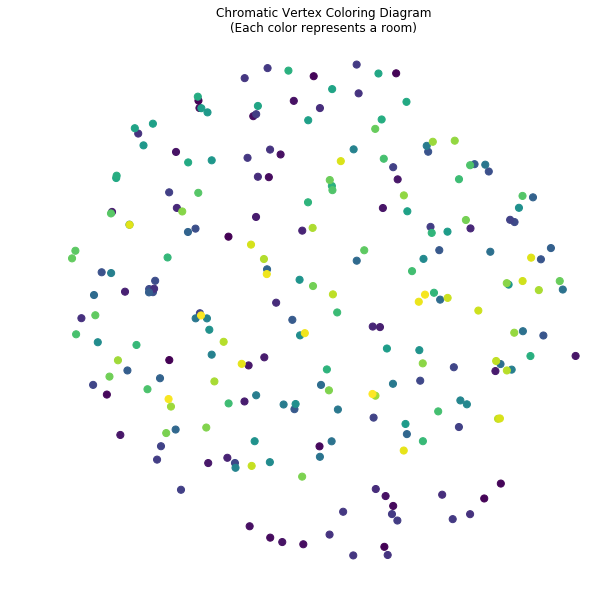

In [16]:
#implementation of welsh_powell algorithm
def welsh_powell(G):
    #sorting the nodes based on it's valency
    node_list = sorted(G.nodes())
    col_val = {} #dictionary to store the colors assigned to each node
    col_val[node_list[0]] = 0 #assign the first color to the first node
    # Assign colors to remaining N-1 nodes
    for node in node_list[1:]:
        available = [True] * len(G.nodes()) #boolean list[i] contains false if the node color 'i' is not available

        #iterates through all the adjacent nodes and marks it's color as unavailable, if it's color has been set already
        for adj_node in G.neighbors(node): 
            if adj_node in col_val.keys():
                col = col_val[adj_node]
                available[col] = False
        clr = 0
        for clr in range(len(available)):
            if available[clr] == True:
                break
        col_val[node] = clr
    return col_val

col_val = welsh_powell(G)
chromatic_number = max(list(col_val.values()))
print('The minimum number of rooms to allocate for all %d guests who stay at the hotel\nduring the week between %s and %s is: %d rooms.'
      %(df2.shape[0],
      startdate.strftime("%a, %d %B %Y"),
      enddate,
      chromatic_number))

values = [col_val.get(node, 'blue') for node in G.nodes()]
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G, with_labels=False, node_color = values, node_size=50, width=0.1, edge_color='white', pos=nx.spring_layout(G))
plt.title("Chromatic Vertex Coloring Diagram\n(Each color represents a room)")
plt.show()

# 7. Considering different room types

In [77]:
# Get room types values
room_type_list = df2['ReservedRoomType'].unique()
print("%d types of rooms at the hotel is:" % (len(room_type_list)))
for i in room_type_list:
    print(i,end="");

7 types of rooms at the hotel is:
A               D               E               F               G               C               H               

In [58]:
# Create "to" & "from" dictionaries with structure {type of room, [list of guests]} to run graph algorithm
fro_type = {}
to_type = {}
for room in room_type_list:
    fro_type[room] = []
    to_type[room] = []

for day in weekorder:
    for i in range(df2.shape[0]):
        for j in range(i+1,df2.shape[0]):
            if (((df2.iloc[i:i+1]['ReservedRoomType'].values[0]) == (df2.iloc[j:j+1]['ReservedRoomType'].values[0]))
                & ((df2.iloc[i:i+1][day].values[0]) == (df2.iloc[j:j+1][day].values[0]))):
                room = df2.iloc[i:i+1]['ReservedRoomType'].values[0]
                fro_type[room].append(i)
                to_type[room].append(j)

In [78]:
# Run welsh powell algorithm
vertex_color_type = {}
for room in room_type_list:
    fro = fro_type[room]
    to = to_type[room]
    if (len(fro)!=0 and len(to)!=0):
        G=nx.from_pandas_edgelist(pd.DataFrame({ 'from':fro, 'to':to}), 'from', 'to')
        col_val = welsh_powell(G)
        chromatic_number = max(list(col_val.values()))
        vertex_color_type[room] = chromatic_number
    else:
        vertex_color_type[room] = 1

In [79]:
# Output results
print('The minimum number of rooms of each type to allocate for all %d guests who stay at the hotel\nduring the week between %s and %s is:'
      %(df2.shape[0],
      startdate.strftime("%a, %d %B %Y"),
      enddate))
for room in vertex_color_type.keys():
    print(room, vertex_color_type[room])
    
print('Total number of rooms is: %d.'%sum(vertex_color_type.values()))

The minimum number of rooms of each type to allocate for all 231 guests who stay at the hotel
during the week between Thu, 03 September 2015 and Wed, 09 September 2015 is:
A                89
D                59
E                32
F                6
G                4
C                1
H                1
Total number of rooms is: 192.
